<a href="https://colab.research.google.com/github/keithferns98/DeepLearning/blob/main/MNIST_with_9kparamsonly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


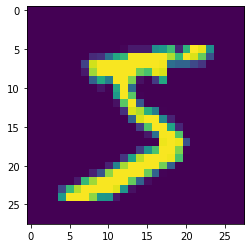

In [4]:
plt.imshow(X_train[0])

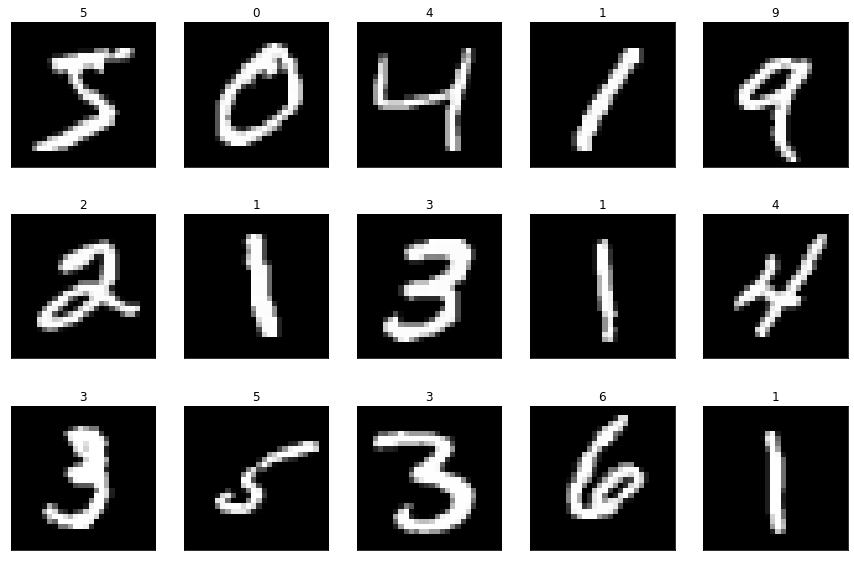

In [5]:
fig=plt.figure(figsize=(15,10))
for i in range(15):
  ax=fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(X_train[i].reshape(28,28),cmap='gray')
  ax.set_title(y_train[i])

In [6]:
#reshaping the image size
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [7]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

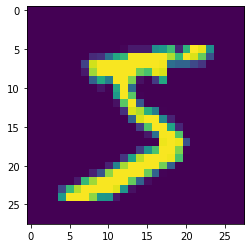

In [9]:
plt.imshow(X_train[0].reshape(28,28))

In [10]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)

In [13]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [14]:
model=Sequential()
model.add(Conv2D(10,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))  #28*28*1
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(15,kernel_size=(3,3) ,activation="relu")) #26*26*10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(10,kernel_size=(5,5),activation="relu")) #24*24*15
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(15,kernel_size=(3,3),activation="relu")) #10*10*10
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(10,kernel_size=(4,4),activation="relu")) #4*4*15

model.add(Flatten())#1*1*10

model.add(Activation("softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 10)       40        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 15)        1365      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 15)       60        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 15)        0

In [16]:
# We are importing the Adam Optimizer
from tensorflow.keras.optimizers import Adam

# # We are importing the learningratescheduler callback
# from tensorflow.keras.callbacks import LearningRateScheduler
# #Creating the "scheduler" function with two arguments i.e learningrate and epoch
# def scheduler(epoch, lr):
#   return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# #	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
938/938 [==============================] - 10s 7ms/step - loss: 0.5015 - accuracy: 0.8269 - val_loss: 0.3059 - val_accuracy: 0.8797
Epoch 2/20
938/938 [==============================] - 6s 7ms/step - loss: 0.3057 - accuracy: 0.8798 - val_loss: 0.2785 - val_accuracy: 0.8871
Epoch 3/20
938/938 [==============================] - 6s 7ms/step - loss: 0.2766 - accuracy: 0.8891 - val_loss: 0.0426 - val_accuracy: 0.9861
Epoch 4/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 5/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0277 - val_accuracy: 0.9906
Epoch 6/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0326 - val_accuracy: 0.9901
Epoch 7/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0345 - val_accuracy: 0.9889
Epoch

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.029723288491368294, 0.9914000034332275]


In [21]:
y_pred = model.predict(X_test)


64

In [22]:
predictions=[]
for i in range(11):
  predicti=np.argmax(y_pred[i])
  predictions.append(predicti)

In [23]:
predictions

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0]

In [25]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)